In [100]:
%matplotlib inline

import cv2
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import json

In [101]:
with open('Example Photos/Fin2.txt', 'r') as f:
    ReadInfo = f.read()

In [102]:
StoredData = json.loads(ReadInfo)

In [103]:
ConvStoredData = [((Stor[0][0], Stor[0][1]), np.array(Stor[1], dtype = np.uint8), Stor[2]) for Stor in StoredData[1]]

In [104]:
Size = StoredData[0]

In [105]:
def PositionDistance(P1, P2):
    return (P1[0] - P2[0]) * (P1[0] - P2[0]) + (P1[1] - P2[1]) * (P1[1] - P2[1])

In [106]:
imgS = np.zeros(Size, dtype=np.uint8)
imgMask = np.ones((Size[0], Size[1]), dtype=np.float32) * 1e5

In [107]:
for k in range(len(ConvStoredData)):
    ConvStoredData[k] = (ConvStoredData[k][0], ConvStoredData[k][1], math.sqrt(ConvStoredData[k][2] / math.pi))

In [108]:
for C in ConvStoredData:
    for x in range(int(max(0, C[0][0] - 2.5 * C[2])), int(min(Size[0], C[0][0] + 2.5 * C[2])) ):
        for y in range(int(max(0, C[0][1] - 2.5 * C[2])), int(min(Size[1], C[0][1] + 2.5 * C[2])) ):
            pos = (x, y)
            dis = PositionDistance(pos, C[0]) / C[2]
            if(dis < imgMask[pos]):
                imgMask[pos] = dis
                imgS[pos] = C[1]


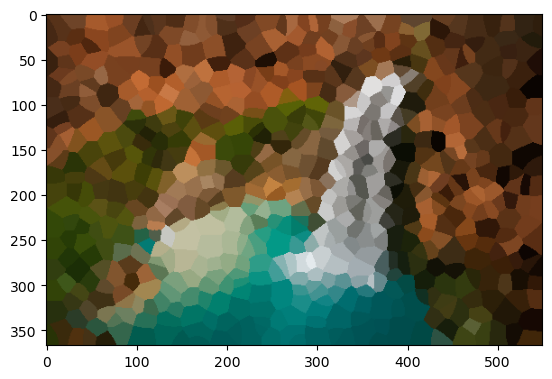

In [109]:
plt.imshow(imgS)

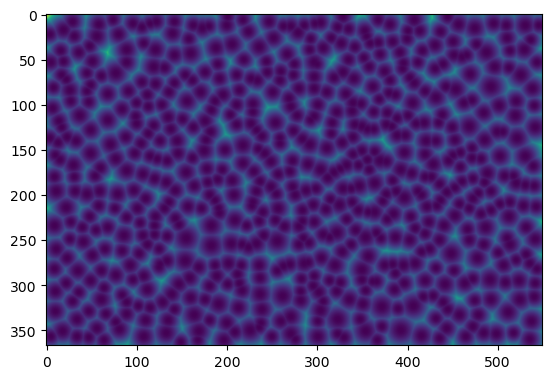

In [110]:
plt.imshow(imgMask)

In [111]:
cv2.imwrite('Example Photos/Fin2Voronoi.jpg', cv2.cvtColor(imgS, cv2.COLOR_RGB2BGR))

True